## DFF1 - 4/5 Intervention par les services d'incendies et de secours (en 2014)

Auteur : Florian Gauthier

Date: 22/12/2016

Data: https://www.data.gouv.fr/fr/datasets/interventions-realisees-par-les-services-d-incendie-et-de-secours/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 9999

In [2]:
interventions2014 = pd.read_csv('../../DATA/interventions2014.csv', sep=";", encoding='latin-1')
interventions2014.head(2)

,Année,Zone,Région,Numéro,Département,Catégorie,Feux d'habitations-bureaux,dont feux de cheminées,Feux d'ERP avec local à sommeil,Feux d'ERP sans local à sommeil,...,Dégagements de voies publiques,Nettoyages de voies publiques,Éboulements,Déposes d'objets,Piquets de sécurité - surveillances,Engins explosifs,Autres opérations diverses,Divers,Opérations diverses,Total interventions
0,2014,Sud-est,PACA,BMPM,Bouches-du-Rhône,NaN,557,3.0,36,145,...,547,407,17,0,788,36,514,7 328,10 476,106 121
1,2014,Île-de-France,Île-de-France,BSPP,Paris,NaN,3 944,68.0,114,643,...,29,282,60,1 162,6,14,20 188,29 602,36 366,442 862


In [3]:
numeric_cols = interventions2014.ix[:, 6:].columns
# Conversion au format numérique
for col in numeric_cols:
    if interventions2014[col].dtypes == object:
        interventions2014[col] = interventions2014[col].str.replace(' ', '')
        interventions2014[col] = pd.to_numeric(interventions2014[col])

In [4]:
sumfrance = interventions2014.iloc[:, 6:].transpose().sum(
    axis=1).sort_values(ascending=False)
sumfrance = sumfrance.reset_index(name='sumfrance')
n_total = interventions2014['Total interventions'].sum()
sumfrance['ratio'] = sumfrance.sumfrance / n_total

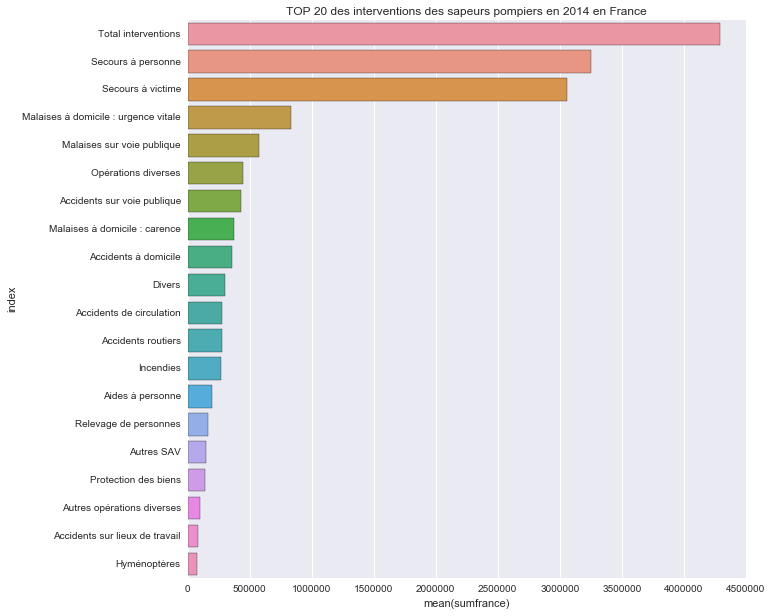

In [5]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="sumfrance", y="index", data=sumfrance.iloc[:20])
plt.title('TOP 20 des interventions des sapeurs pompiers en 2014 en France')

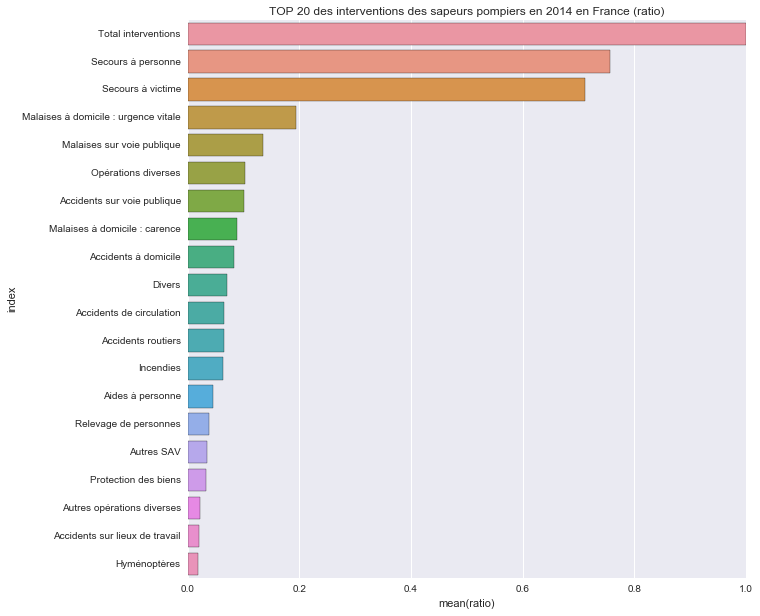

In [6]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="ratio", y="index", data=sumfrance.iloc[:20])
plt.title('TOP 20 des interventions des sapeurs pompiers en 2014 en France (ratio)')

In [7]:
incendies_cols =  [
 'Incendies', 
 'Feux d\'habitations-bureaux',
 'dont feux de cheminées',
 'Feux d\'ERP avec local à sommeil',
 'Feux d\'ERP sans local à sommeil',
 'Feux de locaux industriels',
 'Feux de locaux artisanaux',
 'Feux de locaux agricoles',
 'Feux sur voie publique',
 'Feux de véhicules',
 'Feux de végétations']

n_interventions_incendies = interventions2014.ix[:, incendies_cols].transpose().sum(axis=1).sum()
n_interventions_incendies / n_total

0.12462704587734481

#### Les interventions relatifs à des incendies ne représentent que 12% des interventions de 2014 ! 

# Fun Facts 2014

* 162154 ont été relevées (soient 3.37% des interventions)
* Les Hyménoptères, une famille d'insectes dont font partis les abeilles notamment, ont été à l'origine de 77910 interventions (1.8% des interventions)
* 43186 portes ont été ouvertes !